<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/7%EC%A3%BC%EC%B0%A8/DNN_CNN_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST_fashion 데이터를 가지고 DNN 실습해보기


In [9]:
#데이터 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
#데이터 전처리 (정규화)
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [11]:
#DNN 모델 적용
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#DNN 모델 컴파일
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
#DNN 모델을 이용한 학습
history_dnn = model_dnn.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=128,
    verbose=2
    )

Epoch 1/10
422/422 - 6s - 13ms/step - accuracy: 0.7755 - loss: 0.6273 - val_accuracy: 0.8435 - val_loss: 0.4167
Epoch 2/10
422/422 - 1s - 2ms/step - accuracy: 0.8421 - loss: 0.4388 - val_accuracy: 0.8558 - val_loss: 0.3892
Epoch 3/10
422/422 - 1s - 2ms/step - accuracy: 0.8548 - loss: 0.3994 - val_accuracy: 0.8627 - val_loss: 0.3700
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.8634 - loss: 0.3766 - val_accuracy: 0.8743 - val_loss: 0.3471
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.8705 - loss: 0.3556 - val_accuracy: 0.8787 - val_loss: 0.3392
Epoch 6/10
422/422 - 1s - 2ms/step - accuracy: 0.8747 - loss: 0.3417 - val_accuracy: 0.8768 - val_loss: 0.3356
Epoch 7/10
422/422 - 1s - 2ms/step - accuracy: 0.8781 - loss: 0.3318 - val_accuracy: 0.8813 - val_loss: 0.3305
Epoch 8/10
422/422 - 1s - 2ms/step - accuracy: 0.8801 - loss: 0.3221 - val_accuracy: 0.8797 - val_loss: 0.3299
Epoch 9/10
422/422 - 1s - 2ms/step - accuracy: 0.8848 - loss: 0.3123 - val_accuracy: 0.8835 - val_loss: 0.3221


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


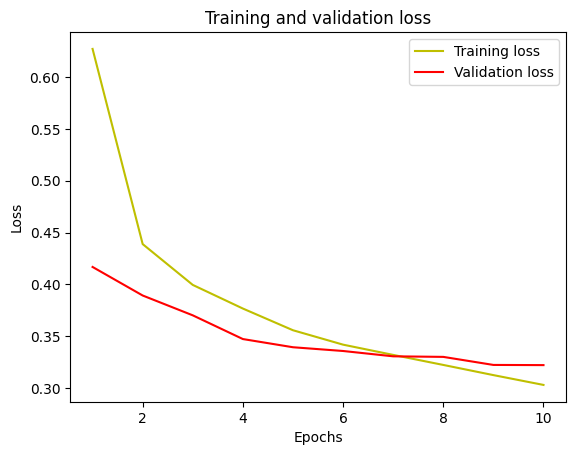

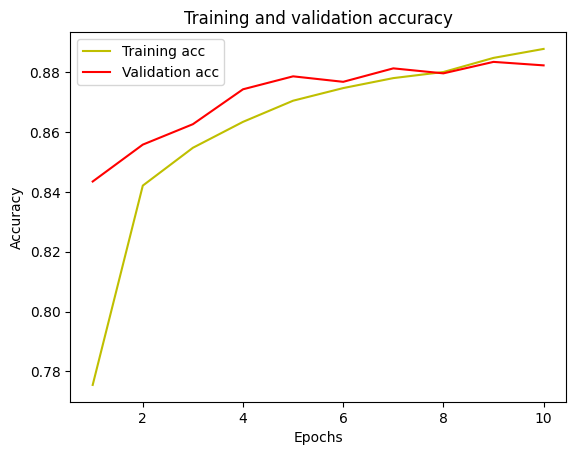

In [14]:
#loss & acc 평가 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loss = history_dnn.history['loss']
val_loss = history_dnn.history['val_loss']
acc = history_dnn.history['accuracy']
val_acc = history_dnn.history['val_accuracy']


y_pred = model_dnn.predict(x_test)

y_pred_class = np.argmax(y_pred,axis=1)


loss = history_dnn.history['loss']
val_loss = history_dnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_dnn.history['accuracy']
val_acc = history_dnn.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
#DNN 예측 결과 비교해보기
predictions = model_dnn.predict(x_test[:5])
print("예측 결과:", np.argmax(predictions, axis=1))
print("실제 레이블:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
예측 결과: [9 2 1 1 6]
실제 레이블: [9 2 1 1 6]


# MNIST_fashion 데이터를 가지고 CNN 실습해보기

In [1]:
#데이터 불러오기
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
#데이터 전처리 (정규화, 차원 추가)
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)  # (60000, 28, 28, 1)
print("x_test shape:", x_test.shape)    # (10000, 28, 28, 1)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
#CNN 모델 적용
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#CNN 모델 컴파일
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#CNN 모델을 이용한 학습
history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 11s - 25ms/step - accuracy: 0.7685 - loss: 0.6281 - val_accuracy: 0.8495 - val_loss: 0.4112
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.8579 - loss: 0.3880 - val_accuracy: 0.8730 - val_loss: 0.3441
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.8791 - loss: 0.3337 - val_accuracy: 0.8945 - val_loss: 0.2967
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.8907 - loss: 0.2997 - val_accuracy: 0.8940 - val_loss: 0.2859
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.8993 - loss: 0.2762 - val_accuracy: 0.9073 - val_loss: 0.2593
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9058 - loss: 0.2559 - val_accuracy: 0.8993 - val_loss: 0.2717
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9108 - loss: 0.2419 - val_accuracy: 0.9070 - val_loss: 0.2452
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9155 - loss: 0.2279 - val_accuracy: 0.9110 - val_loss: 0.2425
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9189 - loss: 0.2187 - val_accuracy: 0.9148 - val_loss: 0.2366

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


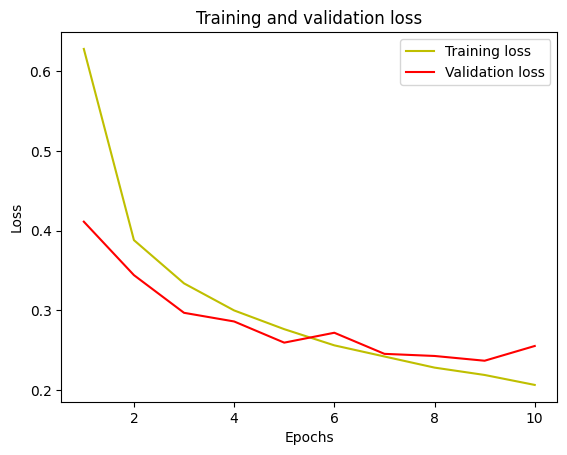

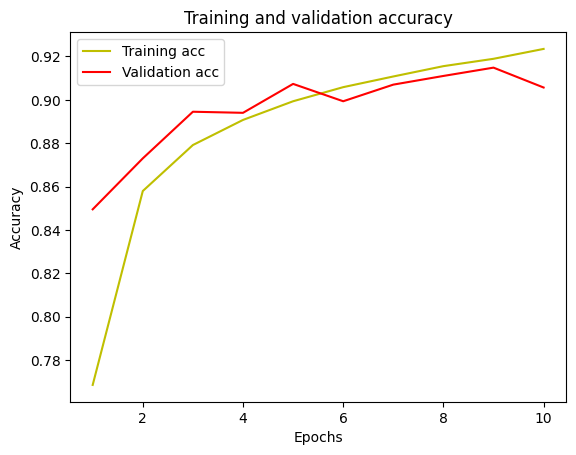

In [7]:
#loss & acc 평가 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']


y_pred = model_cnn.predict(x_test)

y_pred_class = np.argmax(y_pred,axis=1)


loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
#CNN 예측 결과 비교해보기
predictions = model_cnn.predict(x_test[:5])
print("예측 결과:", np.argmax(predictions, axis=1))
print("실제 레이블:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
예측 결과: [9 2 1 1 6]
실제 레이블: [9 2 1 1 6]
